In [111]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [112]:
dta = sm.datasets.fair.load_pandas().data

In [113]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [114]:
dta['affair'] = (dta.affairs>0).astype(int)

In [115]:
dta.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
affair               int32
dtype: object

In [116]:
dta = dta.rename(columns={"rate_marriage": "rateMarriage", "yrs_married": "yearsMarried","occupation_husb":"husbandOccupation"})

In [117]:
dta.head()

,rateMarriage,age,yearsMarried,children,religious,educ,occupation,husbandOccupation,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [118]:
dta.groupby('affair').mean()

,rateMarriage,age,yearsMarried,children,religious,educ,occupation,husbandOccupation,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [119]:
dta.groupby('rateMarriage').mean()

,age,yearsMarried,children,religious,educ,occupation,husbandOccupation,affairs,affair
rateMarriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


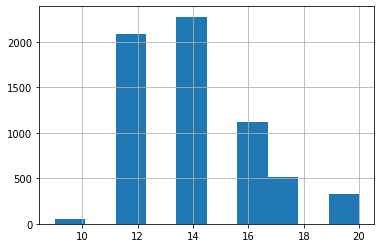

In [120]:
dta['educ'].hist()

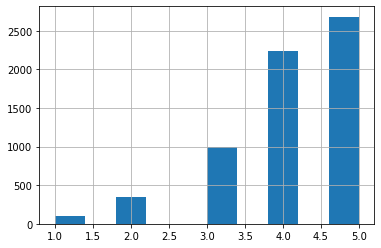

In [121]:
dta['rateMarriage'].hist()

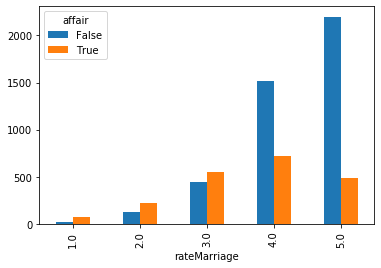

In [122]:
pd.crosstab(dta.rateMarriage, dta.affair.astype(bool)).plot(kind='bar')

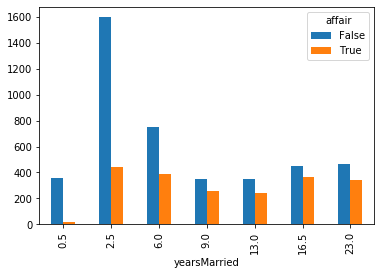

In [123]:
pd.crosstab(dta.yearsMarried, dta.affair.astype(bool)).plot(kind='bar')

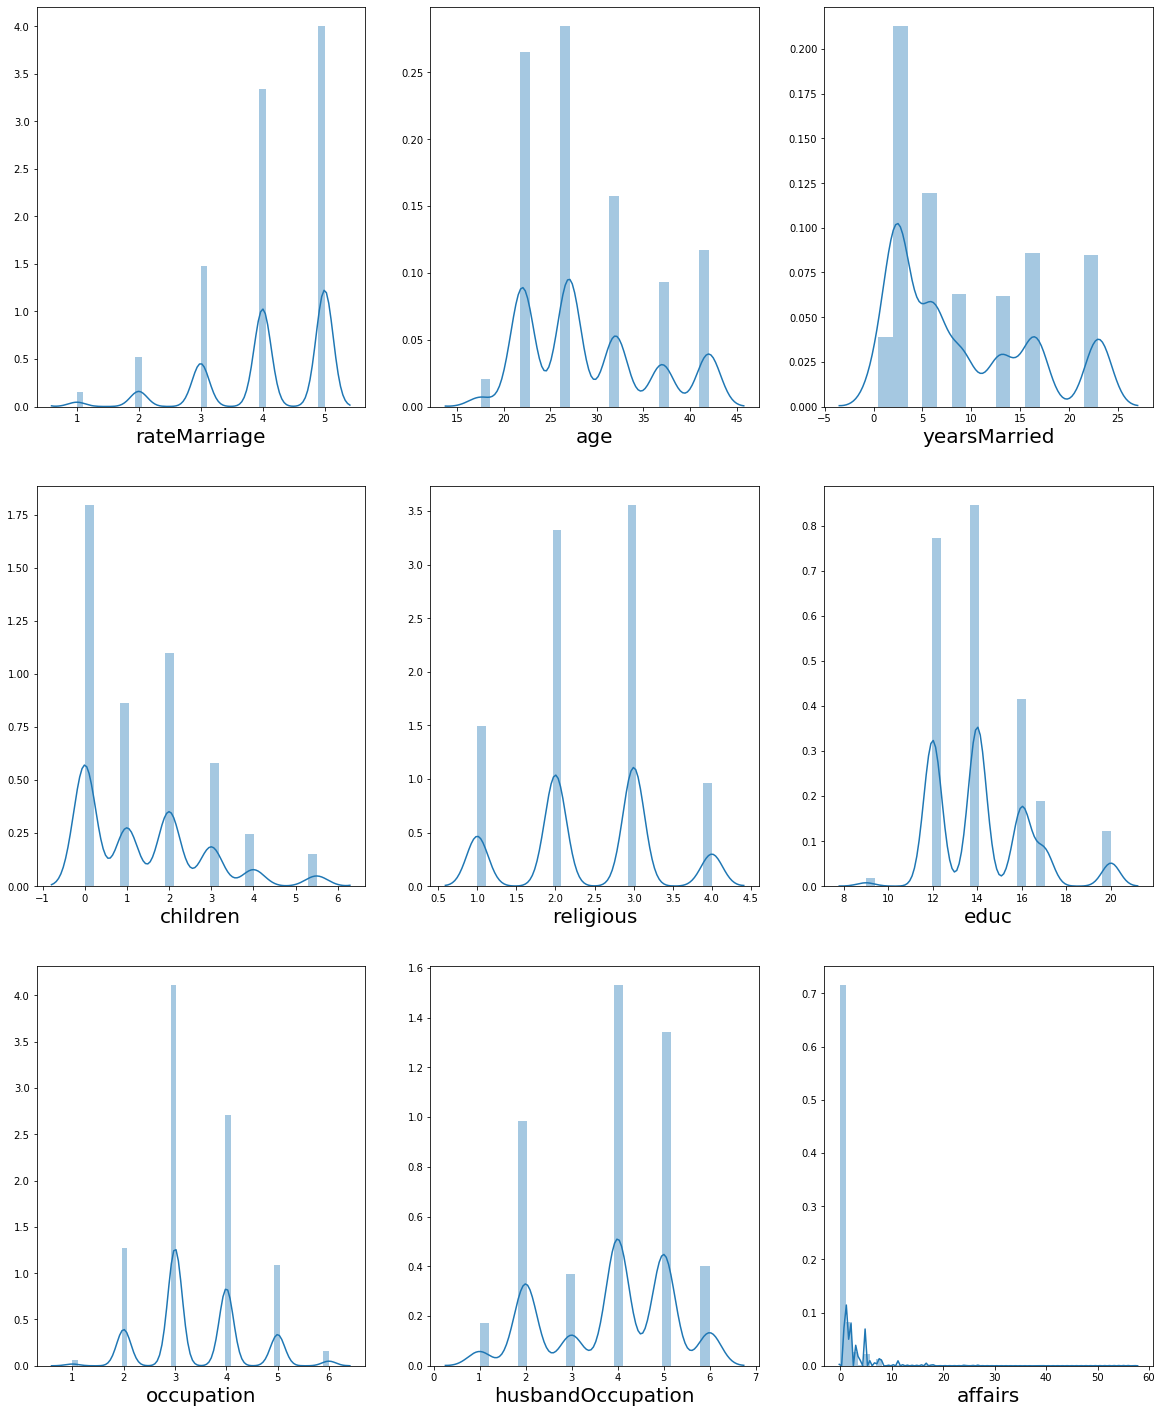

In [124]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dta[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

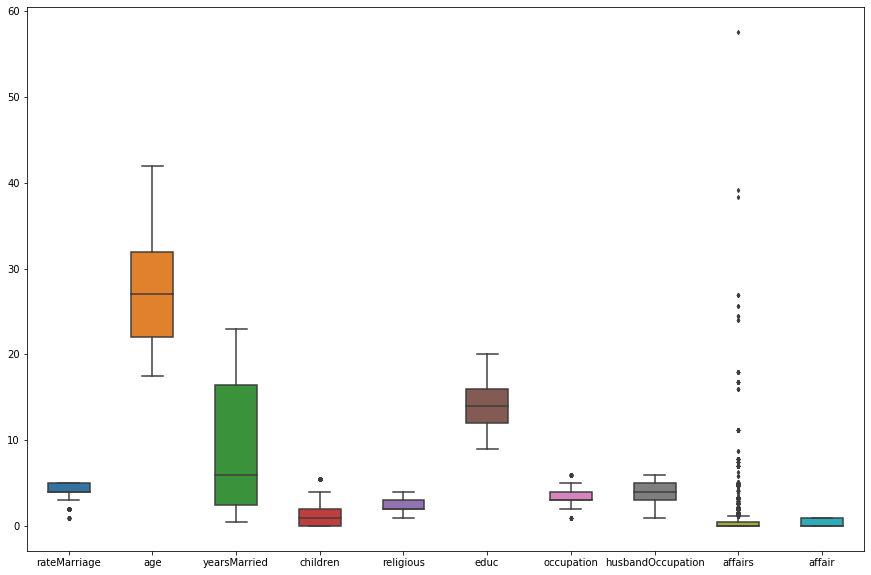

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dta, width= 0.5,ax=ax,  fliersize=3)

In [127]:
q = dta['occupation'].quantile(0.98)
dta['occupation'] = dta[dta['occupation']<q]

In [128]:
q = dta['rateMarriage'].quantile(0.98)
dta['rateMarriage'] = dta[dta['rateMarriage']<q]

In [130]:
dta.isna().sum()

rateMarriage         2684
age                     0
yearsMarried            0
children                0
religious               0
educ                    0
occupation            849
husbandOccupation       0
affairs                 0
affair                  0
dtype: int64

In [131]:
dta['rateMarriage'].value_counts()

4.0    2242
3.0     993
2.0     348
1.0      99
Name: rateMarriage, dtype: int64

In [132]:
dta['occupation'].value_counts()

5.0    2327
4.0    1947
3.0     850
2.0     304
1.0      89
Name: occupation, dtype: int64

In [133]:
dta['rateMarriage']=dta['rateMarriage'].fillna(dta['rateMarriage'].mode()[0])
dta['occupation']=dta['occupation'].fillna(dta['occupation'].mode()[0])

In [134]:
dta.isna().sum()

rateMarriage         0
age                  0
yearsMarried         0
children             0
religious            0
educ                 0
occupation           0
husbandOccupation    0
affairs              0
affair               0
dtype: int64

In [138]:
X = dta.drop(columns = ['affair'], axis =1)
y=dta.affair

In [139]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [140]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,2.653297,rateMarriage
1,5.450443,age
2,7.143332,yearsMarried
3,2.526808,children
4,1.045609,religious
5,1.148431,educ
6,2.646308,occupation
7,1.069651,husbandOccupation
8,1.052103,affairs


In [141]:
X=dta.drop(columns = ['yearsMarried','age','affair','affairs'], axis =1)
X.head()

,rateMarriage,children,religious,educ,occupation,husbandOccupation
0,3.0,3.0,3.0,17.0,3.0,5.0
1,3.0,3.0,1.0,14.0,3.0,4.0
2,4.0,0.0,1.0,16.0,4.0,5.0
3,4.0,4.0,3.0,16.0,5.0,5.0
4,4.0,1.0,1.0,14.0,5.0,4.0


In [142]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [105]:
X.head()

,rateMarriage,children,religious,educ,occupation,husbandOccupation
0,3.0,3.0,3.0,17.0,3.0,5.0
1,3.0,3.0,1.0,14.0,3.0,4.0
2,4.0,0.0,1.0,16.0,4.0,5.0
3,4.0,4.0,3.0,16.0,5.0,5.0
4,4.0,1.0,1.0,14.0,5.0,4.0


In [143]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [144]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
y_pred = log_reg.predict(x_test)

In [146]:
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.7116834170854272

In [147]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[992,  92],
       [367, 141]], dtype=int64)

In [148]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [149]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7116834170854272

In [150]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.915129151291513

In [151]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7299484915378955

In [152]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8121162505116659

In [153]:
auc = roc_auc_score(y_test, y_pred)
auc

0.5963441032048116